# Predicting NBA Daily Fantasy Scores

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import pickle
import nba

First I will scrape every game log for every player from the 2017, 2018, and 2019 seasons.  This uses the nba.py script.  You will notice that these parts are commented out below to avoid re-scraping each time I work on this file.  Instead each year's stats have been loaded into a pickle file that can be loaded on command.

In [2]:
# links_2019 = nba.get_links(2019)

In [3]:
# raw_2019 = nba.get_all_stats(links_2019)

In [4]:
# with open('nba_2019.pickle','wb') as to_write:
#     pickle.dump(raw_2019,to_write)

In [5]:
with open('data/nba_2019.pickle','rb') as read_file:
    stats = pickle.load(read_file)

In [6]:
stats_2019 = pd.DataFrame(stats)

In [7]:
# links_2018 = nba.get_links(2018)
# raw_2018 = nba.get_all_stats(links_2018)

In [8]:
#with open('nba_2018.pickle','wb') as to_write:
 #   pickle.dump(raw_2018,to_write)

In [9]:
with open('data/nba_2018.pickle','rb') as read_file:
    raw_2018 = pickle.load(read_file)

stats_2018 = pd.DataFrame(raw_2018)

In [10]:
#links_2017 = nba.get_links(2017)
#raw_2017 = nba.get_all_stats(links_2017)

In [11]:
#with open('nba_2017.pickle','wb') as to_write:
 #   pickle.dump(raw_2017,to_write)

In [12]:
with open('data/nba_2017.pickle','rb') as read_file:
    raw_2017 = pickle.load(read_file)

stats_2017 = pd.DataFrame(raw_2017)

In [13]:
#links_2016 = nba.get_links(2016)
#raw_2016 = nba.get_all_stats(links_2016)

#with open('nba_2016.pickle','wb') as to_write:
#    pickle.dump(raw_2016,to_write)

In [14]:
with open('data/nba_2016.pickle','rb') as read_file:
    raw_2016 = pickle.load(read_file)
    
stats_2016 = pd.DataFrame(raw_2016)

In [15]:
#links_2015 = nba.get_links(2015)
#raw_2015 = nba.get_all_stats(links_2015)

#with open('nba_2015.pickle','wb') as to_write:
 #   pickle.dump(raw_2015,to_write)

In [16]:
with open('data/nba_2015.pickle','rb') as read_file:
    raw_2015 = pickle.load(read_file)
    
stats_2015 = pd.DataFrame(raw_2015)

In [17]:
# combine them into a single dataframe

nba_stats = pd.concat([stats_2015,stats_2016,stats_2017,stats_2018,stats_2019])
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196678 entries, 0 to 41281
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Player      196678 non-null  object
 1   Rank        196678 non-null  object
 2   Game        187765 non-null  object
 3   Date        187765 non-null  object
 4   Age         187765 non-null  object
 5   Team        187765 non-null  object
 6   Away        187765 non-null  object
 7   Opp         187765 non-null  object
 8   Result      187765 non-null  object
 9   Started     187765 non-null  object
 10  min_played  130404 non-null  object
 11  fgm         130404 non-null  object
 12  fga         130404 non-null  object
 13  fgp         130404 non-null  object
 14  3pm         130404 non-null  object
 15  3pa         130404 non-null  object
 16  3pp         130404 non-null  object
 17  ftm         130404 non-null  object
 18  fta         130404 non-null  object
 19  ftp         130404 non-n

Find out what's going on with the null values.

In [18]:
nba_stats[nba_stats.pts.isnull()]

Player Rank Game        Date     Age Team Away  Opp   Result  \
20     Alan Anderson   Rk  NaN         NaN     NaN  NaN  NaN  NaN      NaN   
41     Alan Anderson   Rk  NaN         NaN     NaN  NaN  NaN  NaN      NaN   
62     Alan Anderson   Rk  NaN         NaN     NaN  NaN  NaN  NaN      NaN   
65     Alan Anderson   63       2015-03-11  32-146  BRK    @  MIA   L (-6)   
78     Alan Anderson   76       2015-04-04  32-170  BRK    @  ATL  L (-32)   
...              ...  ...  ...         ...     ...  ...  ...  ...      ...   
41277     Tony Snell   79       2019-04-04  27-145  MIL    @  PHI   W (+6)   
41278     Tony Snell   80       2019-04-06  27-147  MIL       BRK   L (-5)   
41279     Tony Snell   Rk  NaN         NaN     NaN  NaN  NaN  NaN      NaN   
41280     Tony Snell   81       2019-04-07  27-148  MIL       ATL   W (+8)   
41281     Tony Snell   82       2019-04-10  27-151  MIL       OKC  L (-11)   

             Started  ...  drb  trb  ast  stl  blk  tov   pf  pts GmSc  \
20               NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41               NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
62               NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
65     Did Not Dress  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
78     Not With Team  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41277   Did Not Play  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41278   Did Not Play  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41279            NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41280   Did Not Play  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41281   Did Not Play  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      plus_minus  
20           NaN  
41           NaN  
62           NaN  
65           NaN  
78           NaN  
...          ...  
41277        NaN  
41278        NaN  
41279        NaN  
41280        NaN  
41281        NaN  

[66274 rows x 31 columns]

So it seems like all of the null values in the actual stats columns are a result of that player not playing in that given game.  Because there are zeroes, I'll go ahead and remove rows where any actual stat is null.

In [19]:
nba_stats.dropna(inplace=True)

In [20]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130404 entries, 0 to 41272
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Player      130404 non-null  object
 1   Rank        130404 non-null  object
 2   Game        130404 non-null  object
 3   Date        130404 non-null  object
 4   Age         130404 non-null  object
 5   Team        130404 non-null  object
 6   Away        130404 non-null  object
 7   Opp         130404 non-null  object
 8   Result      130404 non-null  object
 9   Started     130404 non-null  object
 10  min_played  130404 non-null  object
 11  fgm         130404 non-null  object
 12  fga         130404 non-null  object
 13  fgp         130404 non-null  object
 14  3pm         130404 non-null  object
 15  3pa         130404 non-null  object
 16  3pp         130404 non-null  object
 17  ftm         130404 non-null  object
 18  fta         130404 non-null  object
 19  ftp         130404 non-n

Now we are golden.  All rows contain valid values for each column.  But everything is a string.  We need to clean this data into the approriate data types.

In [21]:
# convert data to appropriate data types rather than all strings

ints = ['Rank','Game','Started','fgm','fga','3pm','3pa','ftm','fta','orb','drb','trb','ast','stl','blk','tov','pf','pts']

nba_stats
for col in ints:
    try:
        nba_stats[col] = nba_stats[col].astype(int)
        print('Successfully converted: ',col)
    except:
        print('failed to convert:',col)

floats = ['fgp','3pp','ftp','GmSc']

for col in floats:
    try:
        nba_stats[col] = nba_stats[col].astype(float)
        print('Successfully converted:',col)
    except:
        print('Failed to convert:',col)

nba_stats['Date'] = pd.to_datetime(nba_stats.Date)

nba_stats['Away'] = nba_stats.Away.map({'@':1,' ':0,np.nan:0})

Successfully converted:  Rank
Successfully converted:  Game
Successfully converted:  Started
Successfully converted:  fgm
Successfully converted:  fga
Successfully converted:  3pm
Successfully converted:  3pa
Successfully converted:  ftm
Successfully converted:  fta
Successfully converted:  orb
Successfully converted:  drb
Successfully converted:  trb
Successfully converted:  ast
Successfully converted:  stl
Successfully converted:  blk
Successfully converted:  tov
Successfully converted:  pf
Successfully converted:  pts
Failed to convert: fgp
Failed to convert: 3pp
Failed to convert: ftp
Successfully converted: GmSc


In [22]:
# eliminate columns that are not factored into daily fantasy scoring
# daily fantasy scoring is based on volume so percentages are irrelevant

nba_stats.drop(['Rank','Game','Age','Result','Started','fgp','3pp','ftp','pf','GmSc','plus_minus'],axis=1,inplace=True)
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130404 entries, 0 to 41272
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Player      130404 non-null  object        
 1   Date        130404 non-null  datetime64[ns]
 2   Team        130404 non-null  object        
 3   Away        65104 non-null   float64       
 4   Opp         130404 non-null  object        
 5   min_played  130404 non-null  object        
 6   fgm         130404 non-null  int64         
 7   fga         130404 non-null  int64         
 8   3pm         130404 non-null  int64         
 9   3pa         130404 non-null  int64         
 10  ftm         130404 non-null  int64         
 11  fta         130404 non-null  int64         
 12  orb         130404 non-null  int64         
 13  drb         130404 non-null  int64         
 14  trb         130404 non-null  int64         
 15  ast         130404 non-null  int64         
 16  stl

In [23]:
# attempts are also useless, as is the distinction between offensive and defensive rebounds
# minutes played as well, since increased minutes will be reflected in increased stats if performance level continues

nba_stats.drop(['3pa','fta','fga','orb','drb','min_played'],axis=1,inplace=True)
nba_stats.Away = nba_stats.Away.map({1:1,np.nan:0})  # also fix the null Away issue
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130404 entries, 0 to 41272
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Player  130404 non-null  object        
 1   Date    130404 non-null  datetime64[ns]
 2   Team    130404 non-null  object        
 3   Away    130404 non-null  int64         
 4   Opp     130404 non-null  object        
 5   fgm     130404 non-null  int64         
 6   3pm     130404 non-null  int64         
 7   ftm     130404 non-null  int64         
 8   trb     130404 non-null  int64         
 9   ast     130404 non-null  int64         
 10  stl     130404 non-null  int64         
 11  blk     130404 non-null  int64         
 12  tov     130404 non-null  int64         
 13  pts     130404 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(3)
memory usage: 14.9+ MB


In [24]:
# ensure there are no outliers due to incorrect data
nba_stats.describe()

Away            fgm            3pm            ftm  \
count  130404.000000  130404.000000  130404.000000  130404.000000   
mean        0.499248       3.687847       0.903063       1.640517   
std         0.500001       2.998858       1.288590       2.255397   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       3.000000       0.000000       1.000000   
75%         1.000000       5.000000       1.000000       2.000000   
max         1.000000      24.000000      14.000000      24.000000   

                 trb            ast            stl            blk  \
count  130404.000000  130404.000000  130404.000000  130404.000000   
mean        4.136023       2.165118       0.728858       0.457731   
std         3.497219       2.471826       0.974027       0.841923   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       1.000000       0.000000       0.000000   
75%         6.000000       3.000000       1.000000       1.000000   
max        30.000000      25.000000      10.000000      12.000000   

                 tov            pts  
count  130404.000000  130404.000000  
mean        1.284416       9.919274  
std         1.387650       8.007671  
min         0.000000       0.000000  
25%         0.000000       4.000000  
50%         1.000000       8.000000  
75%         2.000000      14.000000  
max        12.000000      70.000000

In [25]:
# sort by date to perform time series analyses
nba_stats.sort_values(['Player','Date'],inplace=True)

In [26]:
nba_stats.reset_index(drop=True,inplace=True)

In [27]:
nba_stats.head()

Player       Date Team  Away  Opp  fgm  3pm  ftm  trb  ast  stl  blk  \
0  A.J. Hammons 2016-10-28  DAL     0  HOU    0    0    0    0    1    0    0   
1  A.J. Hammons 2016-11-04  DAL     0  POR    0    0    0    0    0    0    0   
2  A.J. Hammons 2016-11-09  DAL     1  GSW    3    1    2    3    0    0    0   
3  A.J. Hammons 2016-11-14  DAL     1  NYK    0    0    0    1    0    0    1   
4  A.J. Hammons 2016-11-18  DAL     0  MEM    0    0    0    1    0    0    1   

   tov  pts  
0    0    0  
1    0    0  
2    0    9  
3    0    0  
4    0    0

Feature engineer a "days rest" column, with the assumption that player's might perform worse on fewer days reset.  Later we will see if this helps the model.

In [28]:
nba_stats['days_rest'] = nba_stats.Date.dt.date.diff().dt.days

In [29]:
nba_stats.dtypes

Player               object
Date         datetime64[ns]
Team                 object
Away                  int64
Opp                  object
fgm                   int64
3pm                   int64
ftm                   int64
trb                   int64
ast                   int64
stl                   int64
blk                   int64
tov                   int64
pts                   int64
days_rest           float64
dtype: object

In [30]:
nba_stats.days_rest.value_counts()

 2.0      69330
 1.0      23069
 3.0      19535
 4.0       5845
 5.0       2348
          ...  
 573.0        1
 326.0        1
 319.0        1
 574.0        1
-50.0         1
Name: days_rest, Length: 726, dtype: int64

In [31]:
# there will be issues each time the series switches to a new player, or a new season
# I will set all of those to zero, assuming a player that hasn't played in a long time may perform even worse 
# than when having little rest

nba_stats.loc[nba_stats.days_rest>7,'days_rest'] = 0
nba_stats.loc[nba_stats.days_rest<0,'days_rest'] = 0
nba_stats.days_rest.fillna(0,inplace=True)

In [32]:
nba_stats.days_rest.value_counts()

2.0    69330
1.0    23069
3.0    19535
0.0     8136
4.0     5845
5.0     2348
6.0     1215
7.0      926
Name: days_rest, dtype: int64

In [33]:
nba_stats.head()

Player       Date Team  Away  Opp  fgm  3pm  ftm  trb  ast  stl  blk  \
0  A.J. Hammons 2016-10-28  DAL     0  HOU    0    0    0    0    1    0    0   
1  A.J. Hammons 2016-11-04  DAL     0  POR    0    0    0    0    0    0    0   
2  A.J. Hammons 2016-11-09  DAL     1  GSW    3    1    2    3    0    0    0   
3  A.J. Hammons 2016-11-14  DAL     1  NYK    0    0    0    1    0    0    1   
4  A.J. Hammons 2016-11-18  DAL     0  MEM    0    0    0    1    0    0    1   

   tov  pts  days_rest  
0    0    0        0.0  
1    0    0        7.0  
2    0    9        5.0  
3    0    0        5.0  
4    0    0        4.0

Now I need to calculate fantasy points scored based on these stats.  DraftKings and FanDuel have slightly different methods, and I will calculate both.  Guides linked below.

[FanDuel](https://www.fanduel.com/nba-training-guide-2019) \
[DraftKings](https://www.draftkings.com/help/rules/nba)

In [34]:
nba_stats['dd'] = ((nba_stats.pts>=10) & ((nba_stats.trb>=10) | (nba_stats.ast>=10))).astype(int)
nba_stats['td'] = ((nba_stats.pts>=10) & (nba_stats.trb>=10) & (nba_stats.ast>=10)).astype(int)

In [35]:
dk = nba_stats.pts + (0.5*(nba_stats['3pm'])) + (1.25*nba_stats.trb) + (1.5*nba_stats.ast) + (2*nba_stats.stl) + \
(2*nba_stats.blk) - (0.5*nba_stats.tov) + (1.5*nba_stats.dd) + (1.5*nba_stats.td)

fd = nba_stats.pts + (1.2*nba_stats.trb) + (1.5*nba_stats.ast) + (3*nba_stats.stl) + (3*nba_stats.blk) - nba_stats.tov
(3*nba_stats.blk) - nba_stats.tov

nba_stats.insert(0,'dk_score',dk)
nba_stats.insert(0,'fd_score',fd)

In [36]:
nba_stats.head()

fd_score  dk_score        Player       Date Team  Away  Opp  fgm  3pm  ftm  \
0       1.5      1.50  A.J. Hammons 2016-10-28  DAL     0  HOU    0    0    0   
1       0.0      0.00  A.J. Hammons 2016-11-04  DAL     0  POR    0    0    0   
2      12.6     13.25  A.J. Hammons 2016-11-09  DAL     1  GSW    3    1    2   
3       4.2      3.25  A.J. Hammons 2016-11-14  DAL     1  NYK    0    0    0   
4       4.2      3.25  A.J. Hammons 2016-11-18  DAL     0  MEM    0    0    0   

   trb  ast  stl  blk  tov  pts  days_rest  dd  td  
0    0    1    0    0    0    0        0.0   0   0  
1    0    0    0    0    0    0        7.0   0   0  
2    3    0    0    0    0    9        5.0   0   0  
3    1    0    0    1    0    0        5.0   0   0  
4    1    0    0    1    0    0        4.0   0   0

Next I will calculate each player's average against each opponent and include those numbers as a column.  Also I will calculate each player's season average as a baseline.

In [37]:
per_player_opp = nba_stats.groupby(['Player','Opp'])[['dk_score','fd_score']].mean().reset_index()
per_player_opp.columns = ['Player','Opp','dk_score_opp','fd_score_opp']

nba_stats['year'] = nba_stats.Date.dt.year
player_mean = nba_stats.groupby(['Player','year'])[['dk_score','fd_score']].mean().reset_index()
player_mean.columns = ['Player','year','dk_mean','fd_mean']

nba_stats = pd.merge(nba_stats,per_player_opp,on=['Player','Opp'])
nba_stats = pd.merge(nba_stats,player_mean,on=['Player','year'])

And now for a very important piece of analysis - trends with time series analysis!  To capture the effect of hot/cold streaks I will take the 3- and 7-game rolling averages of the fantasy scores.  We don't even need to worry about which stats are trending for a given player because they will always be reflected in the fantasy score per the formula. We also want the player's overall average so the model will be able to gauge a long-term mean.

In [38]:
for col in ['dk_score','fd_score']:
    nba_stats[col+ '_trend3'] = nba_stats[col].rolling(window=3).mean().shift(1)
    nba_stats[col+ '_trend7'] = nba_stats[col].rolling(window=7).mean().shift(1)

Now, for the first 3 and 7 values in each field respectively, the average will be incorrect because it will be incorporating other players' scores.  I will replace those values with the player's overall averages.

In [39]:
for player in nba_stats.Player.unique():
    nba_stats.loc[nba_stats[nba_stats.Player==player].head(3).index,'dk_score_trend3'] = nba_stats[nba_stats.Player==player]['pts'].mean()
    nba_stats.loc[nba_stats[nba_stats.Player==player].head(7).index,'dk_score_trend7'] = nba_stats[nba_stats.Player==player]['pts'].mean()
    nba_stats.loc[nba_stats[nba_stats.Player==player].head(3).index,'fd_score_trend3'] = nba_stats[nba_stats.Player==player]['pts'].mean()
    nba_stats.loc[nba_stats[nba_stats.Player==player].head(7).index,'fd_score_trend7'] = nba_stats[nba_stats.Player==player]['pts'].mean()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Next I create functions to plot a single player or group of players' scores by home/away, per opponent, and per days rest.

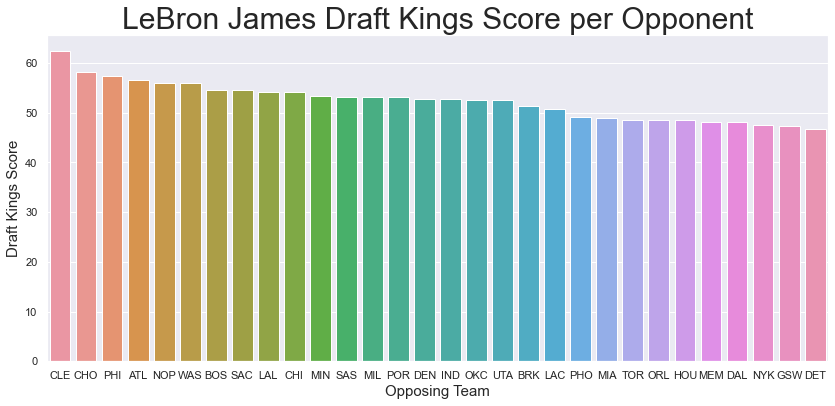

In [41]:
def plot_player_opp(player_list,name='',save=False):
    data = nba_stats[nba_stats.Player.isin(player_list)]
    data_by_opp = data.groupby('Opp')['dk_score'].mean().reset_index().sort_values(by='dk_score',ascending=False)
    
    plt.figure(figsize=(14,6))
    sns.barplot(x='Opp',y='dk_score',data=data_by_opp)
    plt.xlabel('Opposing Team',fontsize=15)
    plt.ylabel('Draft Kings Score',fontsize=15)
    
    #dynamic title
    if len(player_list) >1:
        plt.title(name + 'Draft Kings Score per Opponent',fontsize=30)
    else:
        plt.title(player_list[0]+' Draft Kings Score per Opponent',fontsize=30);
    
    #option to save
    if save:
        plt.savefig('images/' + player_list[0] + '_opp.png',dpi=400)
        
plot_player_opp(['LeBron James'],save=True)

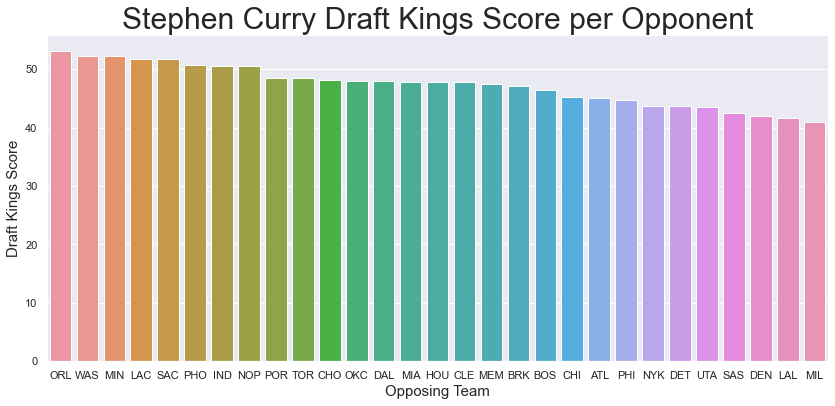

In [42]:
plot_player_opp(['Stephen Curry'],save=True)

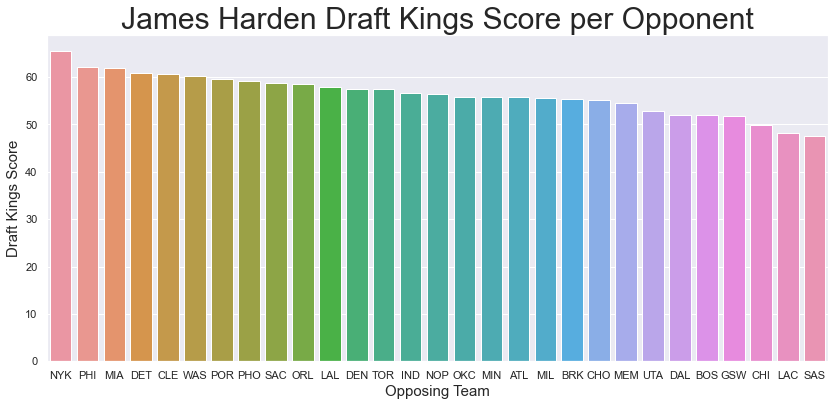

In [43]:
plot_player_opp(['James Harden'],save=True)

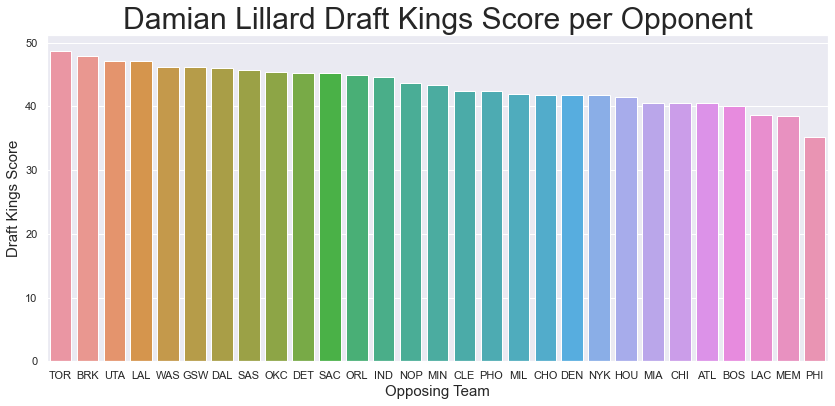

In [44]:
plot_player_opp(['Damian Lillard'],save=True)

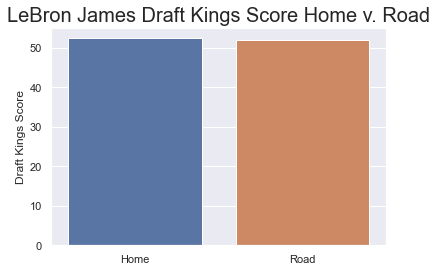

In [45]:
def plot_player_away(player_list,name='',save=False):
    data = nba_stats[nba_stats.Player.isin(player_list)]
    data_by_away = data.groupby('Away')['dk_score'].mean().reset_index()
    
    data_by_away.Away = data_by_away.Away.map({0:'Home',1:'Road'})
    sns.barplot(x='Away',y='dk_score',data=data_by_away)
    plt.xlabel('')
    plt.ylabel('Draft Kings Score')
    
    #dynamic title
    if len(player_list) >1:
        plt.title(name + ' Draft Kings Score Home v. Road',fontsize=20)
    else:
        plt.title(player_list[0] + ' Draft Kings Score Home v. Road',fontsize=20)
        
    #option to save
    if save:
        plt.savefig('images/' + player_list[0] + '_away.png',dpi=400)
    
plot_player_away(['LeBron James'],save=True)

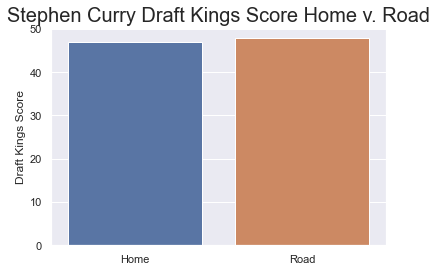

In [46]:
plot_player_away(['Stephen Curry'],save=True)

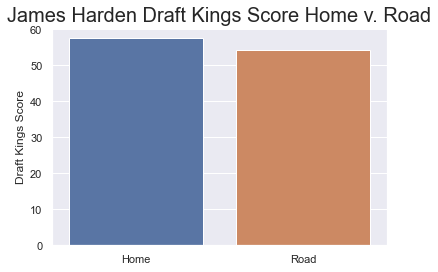

In [47]:
plot_player_away(['James Harden'],save=True)

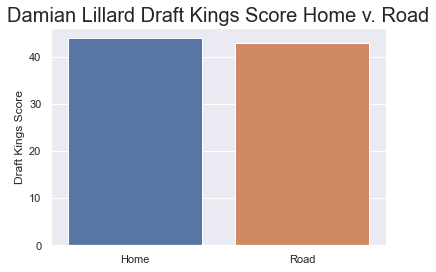

In [48]:
plot_player_away(['Damian Lillard'],save=True)

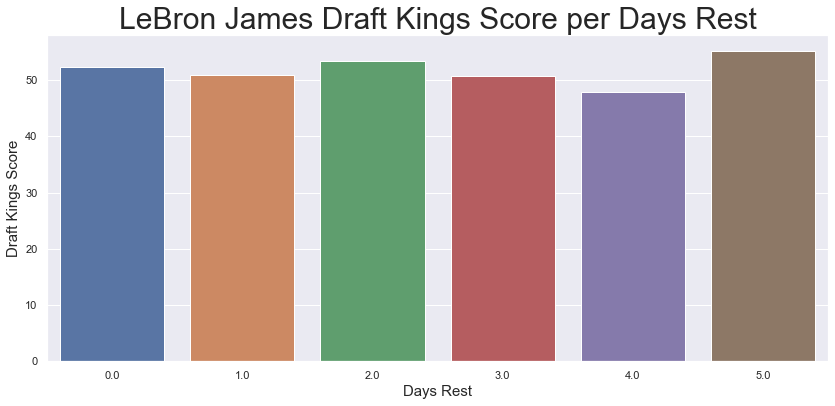

In [49]:
def plot_player_days_rest(player_list,name='',save=True):
    data = nba_stats[nba_stats.Player.isin(player_list)]
    data_by_days_rest = data.groupby('days_rest')['dk_score'].mean().reset_index()
    
    plt.figure(figsize=(14,6))
    sns.barplot(x='days_rest',y='dk_score',data=data_by_days_rest)
    plt.xlabel('Days Rest',fontsize=15)
    plt.ylabel('Draft Kings Score',fontsize=15)
    
    #dynamic title
    if len(player_list) >1:
        plt.title(name + ' Draft Kings Score per Days Rest',fontsize=30)
    else:
        plt.title(player_list[0]+' Draft Kings Score per Days Rest',fontsize=30)
        
    #option to save
    if save:
        plt.savefig('images/' + player_list[0] + '_rest.png',dpi=400)
        
plot_player_days_rest(['LeBron James'],save=True)

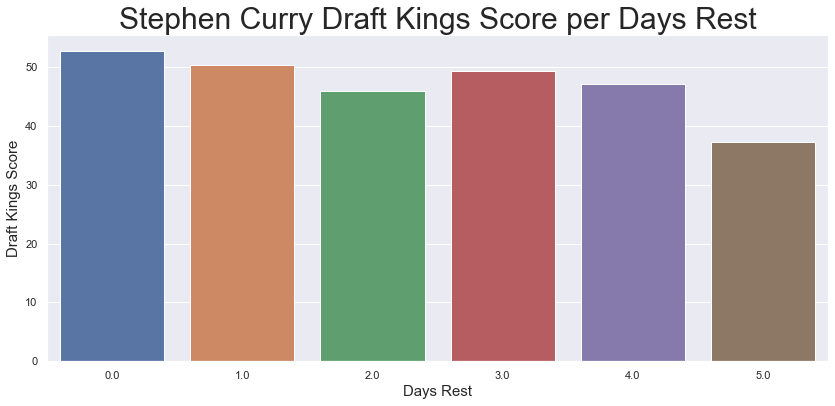

In [50]:
plot_player_days_rest(['Stephen Curry'],save=True)

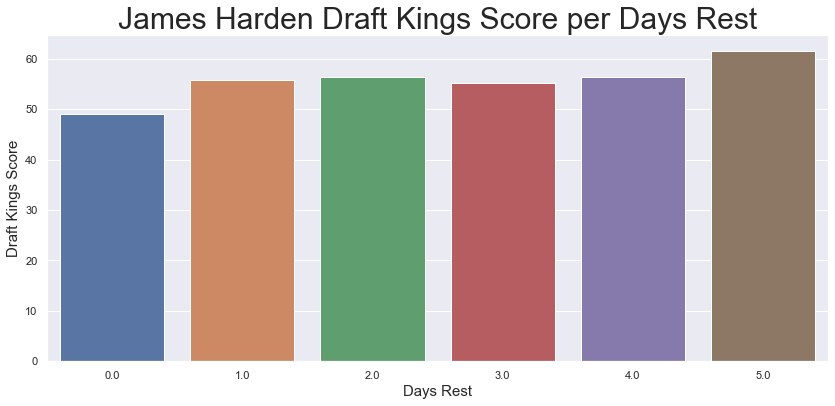

In [51]:
plot_player_days_rest(['James Harden'],save=True)

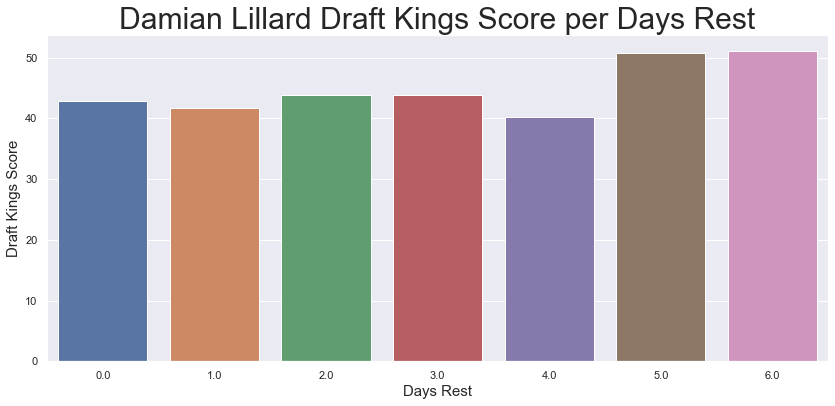

In [52]:
plot_player_days_rest(['Damian Lillard'],save=True)

This tells me that these features are highly interactive with the player.  Therefore, I need new variables that will take into account the player.  Per-opponent average already does this, so I will need to do the same thing for home/road and days rest.

In [53]:
per_player_loc = nba_stats.groupby(['Player','Away'])[['dk_score','fd_score']].mean().reset_index()
per_player_loc.columns = ['Player','Away','dk_score_loc','fd_score_loc']

per_player_rest = nba_stats.groupby(['Player','days_rest'])[['dk_score','fd_score']].mean().reset_index()
per_player_rest.columns = ['Player','days_rest','dk_score_rest','fd_score_rest']

nba_stats = pd.merge(nba_stats,per_player_loc,on=['Player','Away'])
nba_stats = pd.merge(nba_stats,per_player_rest,on=['Player','days_rest'])

Now we are ready to explore models and predict!

In [54]:
features = ['dk_score_loc','dk_score_rest','dk_score_trend3','dk_score_trend7','dk_mean','dk_score_opp']

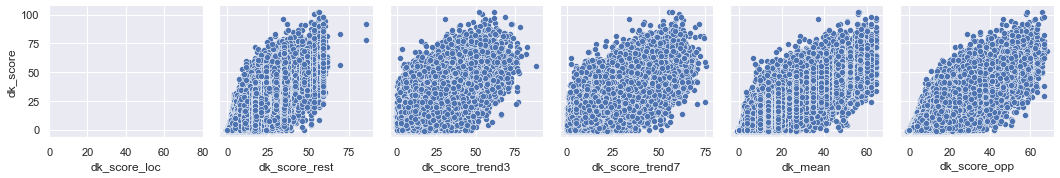

In [55]:
g = sns.pairplot(nba_stats,x_vars=features,y_vars='dk_score')
g.axes[0,0].set_xlim(0,80)
plt.savefig('images/correlations.png',dpi=300);

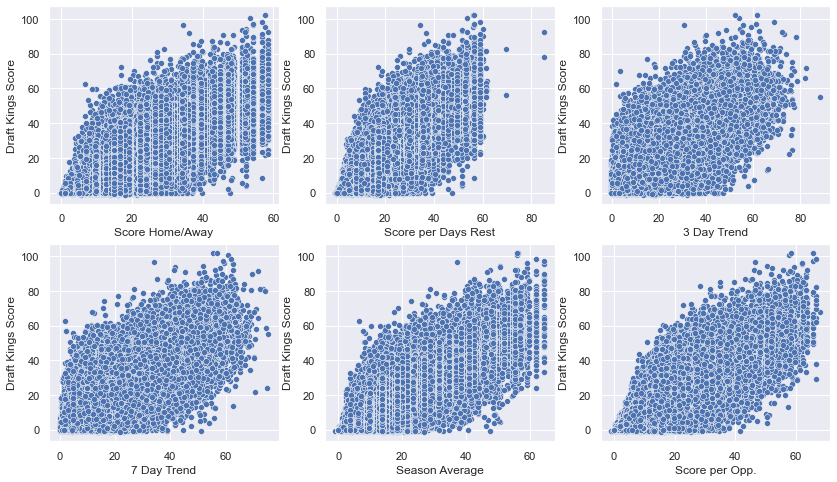

In [56]:
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
sns.scatterplot(x='dk_score_loc',y='dk_score',data=nba_stats)
plt.xlabel('Score Home/Away')
plt.ylabel('Draft Kings Score')

plt.subplot(2,3,2)
sns.scatterplot(x='dk_score_rest',y='dk_score',data=nba_stats)
plt.xlabel('Score per Days Rest')
plt.ylabel('Draft Kings Score')

plt.subplot(2,3,3)
sns.scatterplot(x='dk_score_trend3',y='dk_score',data=nba_stats)
plt.xlabel('3 Day Trend')
plt.ylabel('Draft Kings Score')

plt.subplot(2,3,4)
sns.scatterplot(x='dk_score_trend7',y='dk_score',data=nba_stats)
plt.xlabel('7 Day Trend')
plt.ylabel('Draft Kings Score')

plt.subplot(2,3,5)
sns.scatterplot(x='dk_mean',y='dk_score',data=nba_stats)
plt.xlabel('Season Average')
plt.ylabel('Draft Kings Score')

plt.subplot(2,3,6)
sns.scatterplot(x='dk_score_opp',y='dk_score',data=nba_stats)
plt.xlabel('Score per Opp.')
plt.ylabel('Draft Kings Score')

plt.savefig('images/correlations.png',dpi=400);

First I run the pairplot to check each variable's relationship with the target.  All seem to be very linear, and so we will not need to generate any power terms.  

Next I will check out the correlation coefficients of each variable with the target.

In [57]:
corrs = pd.DataFrame(nba_stats.corr()['dk_score'][features].values,columns=['Draft Kings Score'],index=['Road Team','Days Rest',
                                                                                  '3 Game Trend','7 Game Trend',
                                                                                  'Season Average','Average v. Opponent'])

import plotly.figure_factory as ff
fig = ff.create_table(corrs,index=True)
fig.update_layout(autosize=False,width=500,height=200,)
fig.write_image("images/table_plotly.png", scale=2)
fig.show()

In [58]:
#split data between what is needed for DraftKings v. FanDuel

dk = nba_stats[['dk_score','Player','Date','Team','dk_score_loc','Opp','dk_score_rest','dd','td',
               'dk_score_trend3','dk_score_trend7','dk_mean','dk_score_opp']]

fd = nba_stats[['fd_score','Player','Date','Team','Away','Opp','days_rest',
               'fd_score_trend3','fd_score_trend7','fd_mean','fd_score_opp']]

Start with a very basic model with only the best feature (per opponent average).

Due to the fact that I have data that is somewhat time-series in nature, I will not be able to to the typical random test/train split or cross validation.  I will instead leave the first year of data (2015) out completely, and let it serve merely as features for use in predicting later year's performance.  

I will use 2016-2018 as my training set, and 2019 as my test set.

For a baseline I will find the standard deviation of scores and see how the test RMSE compares to that.

In [59]:
dk.dk_score.describe()['std']

14.023547595298565

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

train = dk[dk.Date.dt.year.isin([2016,2017,2018])]
test = dk[dk.Date.dt.year==2019]

x_train = train.dk_score_opp.values.reshape(-1,1)
x_test = test.dk_score_opp.values.reshape(-1,1)
y_train = train.dk_score
y_test = test.dk_score

lr = LinearRegression().fit(x_train,y_train)
pred_test = lr.predict(x_test)
pred_train = lr.predict(x_train)

# define a function for quickly viewing all model results

def get_metrics(pred_test,pred_train):
    print('Training set:')
    print('R squared: ',r2_score(y_train,pred_train))
    print('RMSE: ',np.sqrt(mean_squared_error(y_train,pred_train)))
    print('')
    print('Test Set:')
    print('R squared: ',r2_score(y_test,pred_test))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred_test)))
    
get_metrics(pred_test,pred_train)

Training set:
R squared:  0.5705087256060519
RMSE:  9.253254186837477

Test Set:
R squared:  0.5603002151591747
RMSE:  9.801032656300666


In [61]:
# now try all features

X_train_all = train[features]
X_test_all = test[features]

lr_all = LinearRegression().fit(X_train_all,y_train)
pred_test_all = lr_all.predict(X_test_all)
pred_train_all = lr_all.predict(X_train_all)

get_metrics(pred_test_all,pred_train_all)

Training set:
R squared:  0.6188860567140868
RMSE:  8.71655227102398

Test Set:
R squared:  0.6612812071817267
RMSE:  8.602275673935592


In [62]:
# now increase model complexity with interaction features to try and raise the model scores

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True)
X_train_poly = poly.fit_transform(X_train_all)
X_test_poly = poly.transform(X_test_all)

lr_poly = LinearRegression().fit(X_train_poly,y_train)
pred_train_poly = lr_poly.predict(X_train_poly)
pred_test_poly = lr_poly.predict(X_test_poly)

get_metrics(pred_test_poly,pred_train_poly)

Training set:
R squared:  0.6196200938726952
RMSE:  8.708154051590126

Test Set:
R squared:  0.6614972400247641
RMSE:  8.599531996112912


Higher order features didn't help all that much, so the best model is simple linear regression with all 6 features.  Let's see how the predictions look in graph form.

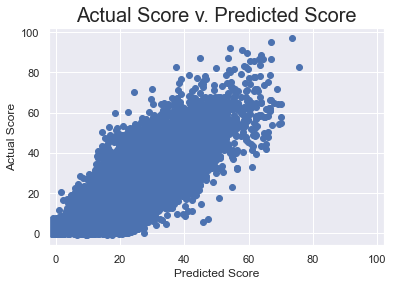

In [70]:
plt.scatter(x=pred_test_all,y=y_test)
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.xlim(-2,102)
plt.title('Actual Score v. Predicted Score',fontsize=20)
plt.savefig('images/prediction_scatter.png',dpi=300);

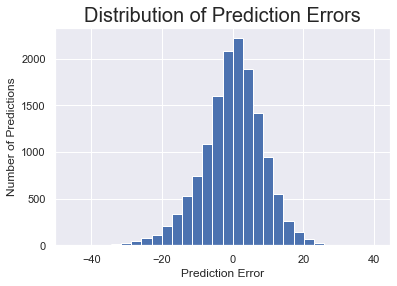

In [64]:
plt.hist(pred_test_all-y_test,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Prediction Errors',fontsize=20)
plt.savefig('images/prediction_dist.png',dpi=400);

And this shouldn't make a difference because my model is not overfitting, but just in case it's part of the grade I will run a regularized model to prove I know how to do it.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

ridge = RidgeCV(alphas=np.linspace(0.1,20,100))
ridge.fit(X_train_poly_scaled,y_train)

pred_ridge_train = ridge.predict(X_train_poly_scaled)
pred_ridge_test = ridge.predict(X_test_poly_scaled)

get_metrics(pred_ridge_test,pred_ridge_train)

Training set:
R squared:  0.6196115158687445
RMSE:  8.708252240476456

Test Set:
R squared:  0.6616412901742033
RMSE:  8.597702032176203


As I suspected, we get basically the same result.